In [1]:
# Notebook mainly used for the Coursera Capstone project

In [2]:
# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y

In [3]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv", low_memory=False)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df = df[['SEVERITYCODE', 'JUNCTIONTYPE', 'ADDRTYPE', 'VEHCOUNT', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]
df.head()

,SEVERITYCODE,JUNCTIONTYPE,ADDRTYPE,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND
0,2,At Intersection (intersection related),Intersection,2,Overcast,Wet,Daylight
1,1,Mid-Block (not related to intersection),Block,2,Raining,Wet,Dark - Street Lights On
2,1,Mid-Block (not related to intersection),Block,3,Overcast,Dry,Daylight
3,1,Mid-Block (not related to intersection),Block,3,Clear,Dry,Daylight
4,2,At Intersection (intersection related),Intersection,2,Raining,Wet,Daylight


In [6]:
df.shape

(194673, 7)

In [7]:
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [8]:
df.groupby(['JUNCTIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True)

JUNCTIONTYPE                                       SEVERITYCODE
At Intersection (but not related to intersection)  1               0.703051
                                                   2               0.296949
At Intersection (intersection related)             1               0.567362
                                                   2               0.432638
Driveway Junction                                  1               0.696936
                                                   2               0.303064
Mid-Block (but intersection related)               1               0.679816
                                                   2               0.320184
Mid-Block (not related to intersection)            1               0.783920
                                                   2               0.216080
Ramp Junction                                      1               0.674699
                                                   2               0.325301
Unknown                 

In [9]:
df['JUNCTIONTYPE'].replace(np.nan, 'Unknown', inplace=True)
df['JUNCTIONTYPE'].replace(['At Intersection (but not related to intersection)',
                            'At Intersection (intersection related)','Driveway Junction','Mid-Block (but intersection related)',
                            'Mid-Block (not related to intersection)', 'Ramp Junction', 'Unknown'], value=[0,1,2,3,4,5,6],inplace=True)

In [10]:
df['JUNCTIONTYPE'].value_counts()

4    89800
1    62810
3    22790
2    10671
6     6338
0     2098
5      166
Name: JUNCTIONTYPE, dtype: int64

In [11]:
df['ADDRTYPE'].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [12]:
df.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize=True)

ADDRTYPE      SEVERITYCODE
Alley         1               0.890812
              2               0.109188
Block         1               0.762885
              2               0.237115
Intersection  1               0.572476
              2               0.427524
Name: SEVERITYCODE, dtype: float64

In [13]:
df['ADDRTYPE'].replace(np.nan, 'Unknown', inplace=True)
df['ADDRTYPE'].replace(['Block','Intersection','Unknown','Alley'], value=[0,1,2,3],inplace=True)

In [14]:
df['ADDRTYPE'].value_counts()

0    126926
1     65070
2      1926
3       751
Name: ADDRTYPE, dtype: int64

In [15]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [16]:
df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.782694
                          2               0.217306
Dark - Street Lights Off  1               0.736447
                          2               0.263553
Dark - Street Lights On   1               0.701589
                          2               0.298411
Dark - Unknown Lighting   1               0.636364
                          2               0.363636
Dawn                      1               0.670663
                          2               0.329337
Daylight                  1               0.668116
                          2               0.331884
Dusk                      1               0.670620
                          2               0.329380
Other                     1               0.778723
                          2               0.221277
Unknown                   1               0.955095
                          2               0.044905
Name: SEVERITYCODE, dtype: float64

In [17]:
df['LIGHTCOND'].replace(np.nan, 'Unknown', inplace=True)
df['LIGHTCOND'].replace(['Daylight','Dark - Street Lights On','Unknown','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off',
                                    'Other','Dark - Unknown Lighting'], value=[0,1,2,3,4,5,6,7,8],inplace=True)

In [18]:
df['LIGHTCOND'].value_counts()

0    116137
1     48507
2     18643
3      5902
4      2502
5      1537
6      1199
7       235
8        11
Name: LIGHTCOND, dtype: int64

In [19]:
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [20]:
df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND        SEVERITYCODE
Dry             1               0.678227
                2               0.321773
Ice             1               0.774194
                2               0.225806
Oil             1               0.625000
                2               0.375000
Other           1               0.674242
                2               0.325758
Sand/Mud/Dirt   1               0.693333
                2               0.306667
Snow/Slush      1               0.833665
                2               0.166335
Standing Water  1               0.739130
                2               0.260870
Unknown         1               0.950325
                2               0.049675
Wet             1               0.668134
                2               0.331866
Name: SEVERITYCODE, dtype: float64

In [21]:
df['ROADCOND'].replace(np.nan, 'Unknown', inplace=True)
df['ROADCOND'].replace(to_replace=['Dry','Wet','Unknown','Ice','Snow/Slush','Other','Standing Water',
                                'Sand/Mud/Dirt','Oil'], value=[0,1,2,3,4,5,6,7,8],inplace=True)

In [22]:
df['ROADCOND'].value_counts()

0    124510
1     47474
2     20090
3      1209
4      1004
5       132
6       115
7        75
8        64
Name: ROADCOND, dtype: int64

In [23]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [24]:
df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.732143
                          2               0.267857
Clear                     1               0.677509
                          2               0.322491
Fog/Smog/Smoke            1               0.671353
                          2               0.328647
Other                     1               0.860577
                          2               0.139423
Overcast                  1               0.684456
                          2               0.315544
Partly Cloudy             2               0.600000
                          1               0.400000
Raining                   1               0.662815
                          2               0.337185
Severe Crosswind          1               0.720000
                          2               0.280000
Sleet/Hail/Freezing Rain  1               0.752212
                          2               0.247788
Snowing                   1               0

In [25]:
df['WEATHER'].replace(np.nan, 'Unknown', inplace=True)
df['WEATHER'].replace(to_replace=['Clear','Raining','Overcast','Unknown','Snowing','Other','Fog/Smog/Smoke',
                                'Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'], value=[0,1,2,3,4,5,6,7,8,9,10],inplace=True)

In [26]:
df['WEATHER'].value_counts()

0     111135
1      33145
2      27714
3      20172
4        907
5        832
6        569
7        113
8         56
9         25
10         5
Name: WEATHER, dtype: int64

In [27]:
X=np.asarray(df[['JUNCTIONTYPE', 'ADDRTYPE','VEHCOUNT','LIGHTCOND','ROADCOND','WEATHER']].astype('float'))
X[0:5]

array([[1., 1., 2., 0., 1., 2.],
       [4., 0., 2., 1., 1., 1.],
       [4., 0., 3., 0., 0., 2.],
       [4., 0., 3., 0., 0., 0.],
       [1., 1., 2., 0., 1., 1.]])

In [28]:
y=np.asarray(df['SEVERITYCODE'])
y[0:5]

array([2, 1, 1, 1, 2])

In [29]:
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.24091477,  1.21000624,  0.12553783, -0.62441224,  0.63201046,
         1.01431444],
       [ 0.79534134, -0.697357  ,  0.12553783,  0.30978034,  0.63201046,
         0.14651639],
       [ 0.79534134, -0.697357  ,  1.7102107 , -0.62441224, -0.63653929,
         1.01431444],
       [ 0.79534134, -0.697357  ,  1.7102107 , -0.62441224, -0.63653929,
        -0.72128165],
       [-1.24091477,  1.21000624,  0.12553783, -0.62441224,  0.63201046,
         0.14651639]])

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=1)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (146004, 6) (146004,)
Test set: (48669, 6) (48669,)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [32]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [33]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.80393203, 0.19606797],
       [0.57241104, 0.42758896],
       [0.86868687, 0.13131313],
       ...,
       [0.68840134, 0.31159866],
       [0.74023729, 0.25976271],
       [0.67688103, 0.32311897]])

In [34]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.71682179621525

In [35]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5760810646997876

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.72      0.99      0.83     34222
           2       0.71      0.08      0.14     14447

   micro avg       0.72      0.72      0.72     48669
   macro avg       0.71      0.53      0.49     48669
weighted avg       0.71      0.72      0.63     48669



In [37]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,2]))

[[33745   477]
 [13305  1142]]


Confusion matrix, without normalization
[[33745   477]
 [13305  1142]]


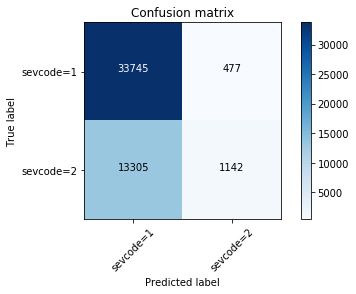

In [38]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['sevcode=1','sevcode=2'],normalize= False,  title='Confusion matrix')